# Tetrode processing

## Imports

In [1]:
import spikeinterface.full as si
import spikeinterface.widgets as sw
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.qualitymetrics as sqm
import probeinterface as pi
from probeinterface import generate_tetrode, ProbeGroup, generate_multi_shank
from probeinterface.plotting import plot_probe, plot_probegroup
#import mountainsort5 as ms5
#from mountainsort5.util import create_cached_recording
import kilosort
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
import os

import warnings
warnings.simplefilter("ignore")

#%matplotlib widget
print(f"SpikeInterface version: {si.__version__}")
np.set_printoptions(threshold=np.inf)

global_job_kwargs = dict(n_jobs=-1, chunk_duration="1s",progress_bar=True)
si.set_global_job_kwargs(**global_job_kwargs)



SpikeInterface version: 0.101.1


In [2]:
%matplotlib widget

In [3]:
!kachery-cloud-init


This client has already been registered.
Click the following link to configure the client:
https://kachery-gateway.figurl.org/client/fb30a897dfc4f0381f7060224cdd868f789909b6e118c7a1d08696d8fc77ea9a

Client ID: fb30a897dfc4f0381f7060224cdd868f789909b6e118c7a1d08696d8fc77ea9a
Label: LAPTOP-BM2ADH0P
Owner: Gyrozaid

* Kachery-cloud is intended for collaborative sharing of data for scientific research. It should not be used for other purposes.


## Read in Data

In [4]:
path_to_data = "C:\\Users\\ryanz\\Documents\\nac_analysis\\raw\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL"
full_raw_rec = si.read_openephys(path_to_data, stream_id="1")


In [5]:
len(os.listdir(path_to_data + "\\experiment1\\recording1\\continuous"))

2

In [6]:
channel_ids = full_raw_rec.get_channel_ids()
full_raw_rec = full_raw_rec.select_channels([channel_id for channel_id in channel_ids if channel_id[0] != 'A'])

In [7]:
full_raw_rec

ChannelSliceRecording: 64 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                       7,823.53s (2.17 hours) - int16 dtype - 27.98 GiB

In [8]:
#raw data, seems to be stored in milliseconds
path_to_behavioral_data = "C:\\Users\\ryanz\\Documents\\nac_analysis\\raw\\behavioraldata\\CPWI18_2019-07-29_13-50-50_LRRLLR 400uA raw.csv"
behavioral_data = pd.read_csv(path_to_behavioral_data)
behavioral_data['TimeStamp'] = behavioral_data['TimeStamp'] / 1000
behavioral_data = behavioral_data.sort_values("TimeStamp")


In [9]:
path_to_behavioral_data_nathaniel = "C:\\Users\\ryanz\\Documents\\nac_analysis\\raw\\behavioraldata\\CPWI18_2019-07-29_13-50-50_LRRLLR 400uA Not Normalized.xlsx"
behavioral_data_nathaniel = pd.read_excel(path_to_behavioral_data_nathaniel)


In [10]:
#channel timestamps
path_to_timestamps = "C:\\Users\\ryanz\\Documents\\nac_analysis\\raw\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\experiment1\\recording1\\events\\Rhythm_FPGA-100.0\\TTL_1\\timestamps.npy"
timestamps = np.load(path_to_timestamps)

#channel timestamps stored in sample number, divide by 30,000 to get seconds
timestamps = timestamps / 30000

#event types
path_to_channels = "C:\\Users\\ryanz\\Documents\\nac_analysis\\raw\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\experiment1\\recording1\\events\\Rhythm_FPGA-100.0\\TTL_1\\channels.npy"
channels = np.load(path_to_channels)

#event types with states
path_to_channel_states = "C:\\Users\\ryanz\\Documents\\nac_analysis\\raw\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\experiment1\\recording1\\events\\Rhythm_FPGA-100.0\\TTL_1\\channel_states.npy"
channel_states = np.load(path_to_channel_states)

#no idea what this is but its in the data
path_to_full_words = "C:\\Users\\ryanz\\Documents\\nac_analysis\\raw\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\CPWI17_2019-10-19_09-20-19_260uA RLLRRL\\experiment1\\recording1\\events\\Rhythm_FPGA-100.0\\TTL_1\\full_words.npy"
full_words = np.load(path_to_full_words)

In [11]:
vals = np.unique(np.abs(channel_states))

events = {}
for i, channel in enumerate(channel_states):
    if channel in events:
        events[channel].append(timestamps[i])
        continue
    
    events[channel] = [timestamps[i]]

events.keys()

dict_keys([2, 4, -4, -2, 5, -5, 1, -1])

In [12]:
events

{2: [757.3569333333334,
  758.0969333333334,
  758.1669,
  758.5769333333334,
  773.4066333333334,
  773.6266333333333,
  775.0466,
  788.7163666666667,
  788.8463333333333,
  788.8963333333334,
  791.3763,
  812.9459333333333,
  813.2759,
  813.6459,
  813.6858666666667,
  814.2058666666667,
  833.0355333333333,
  833.6655333333333,
  833.9655333333334,
  834.0355,
  834.0955,
  834.4755,
  834.5455,
  834.6155,
  834.6655,
  859.4950666666666,
  859.6650333333333,
  859.7650333333333,
  859.8250333333333,
  860.0950333333334,
  860.2850333333333,
  860.3250333333333,
  884.9346,
  885.0545666666667,
  885.1245666666666,
  886.5245666666667,
  889.0145,
  910.8341,
  911.1841,
  911.3740666666666,
  911.9440666666667,
  912.0040666666666,
  912.0940666666667,
  912.1240666666666,
  946.0334333333333,
  947.9034,
  961.8531666666667,
  962.2531333333334,
  962.4731333333333,
  962.5631,
  963.3131,
  963.3631,
  963.4531,
  963.4831,
  963.7231,
  964.3030666666667,
  983.6427333333334

### Raw Behavioral Data

In [13]:
#there seems to be channel errors. channels don't line up with nathaniels sorted data and it seems like trials last like a few milliseconds sometimes
behavioral_data

,ChannelV,TimeStamp
0,2,685.835500
1,-2,685.856233
524,6,686.845467
525,-6,686.856200
2,2,694.555333
...,...,...
1647,-6,8262.146667
2642,5,8262.225933
2643,-5,8264.236633
1648,6,8265.225867


### Nathaniels Behavioral Data

In [14]:
behavioral_data_nathaniel

,Unnamed: 0,Trial Start,Trial End,Seek Attempted,Seek P/F,Left Entries,Right Entries,Tones,Shock,Take,Take Time,Trial Block
0,0,686.845467,704.825133,False,NaN,NaN,"[694.5553333333334, 694.8053333333334]","[[694.5553333333334, 694.6556999999999]]",False,NaN,NaN,0
1,1,705.825100,730.924633,True,Pass,"[715.5049, 730.9246333333333]","[709.0850333333333, 713.4649666666667, 725.514...","[[709.0850666666666, 709.1854000000001], [713....",True,1.0,730.924633,0
2,2,740.704433,767.133900,False,NaN,[753.7741666666666],"[743.1044, 747.7243000000001]","[[743.1044, 743.2047333333333]]",False,NaN,NaN,0
3,3,768.323867,791.333467,True,Pass,"[773.2838, 791.3334666666667]","[770.8838333333334, 776.8537333333333, 779.273...","[[770.8838333333334, 770.9842], [776.853733333...",True,1.0,791.333467,0
4,4,801.143233,801.223233,True,Fail,[801.2232333333333],NaN,[],False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,8213.296900,8223.296700,False,NaN,NaN,NaN,[],False,NaN,NaN,0
245,245,8224.296667,8234.296467,False,NaN,NaN,NaN,[],False,NaN,NaN,0
246,246,8235.296467,8242.736333,True,Pass,[8242.736333333332],"[8235.826466666667, 8236.056466666667, 8237.78...","[[8235.826466666667, 8235.926833333333], [8236...",False,1.0,8242.736333,0
247,247,8252.066133,8262.065933,False,NaN,NaN,NaN,[],False,NaN,NaN,0


### Channel Behavioral Data

In [15]:
print(timestamps[2])
print(timestamps[3])

757.4573
757.4576666666667


In [16]:
print(channel_states[2])
print(channel_states[3])

-4
-2


In [17]:
#haven't finished working this out, seems to be a mismatch
channel_map = {
    'trial_start': 6,
    'right_entry': 2,
    'tone': 4,
    
    
}

In [18]:

structured_events = []
for channel, timestamps in events.items():
    structured_array = np.zeros(len(timestamps), dtype=[('time', float), ('label', 'U10')])
    structured_array['time'] = timestamps
    structured_array['label'] = channel  # using channel as label
    structured_events.append(structured_array)



In [19]:
len(structured_events)

8

In [20]:
ch = np.load("C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output\\kilosort4_sortings\\kilosort4_full\\sorter_output\\channel_map.npy")
print(ch)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [21]:
pos = np.load("C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output\\kilosort4_sortings\\kilosort4_full\\sorter_output\\channel_shanks.npy")
print(pos)

[ 0.  0.  0.  0.  1.  1.  1.  1.  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.
  4.  4.  5.  5.  5.  5.  6.  6.  6.  6.  7.  7.  7.  7.  8.  8.  8.  8.
  9.  9.  9.  9. 10. 10. 10. 10. 11. 11. 11. 11. 12. 12. 12. 12. 13. 13.
 13. 13. 14. 14. 14. 14. 15. 15. 15. 15.]


## Generate Probe Group

Need more info on the tetrode used to record this data. <br>


['CH9', 'CH10', 'CH15', 'CH16', 'CH11', 'CH12', 'CH13', 'CH14', 'CH5', 'CH6', 'CH7', 'CH8', 'CH1', 'CH2', 'CH3', 'CH4', 'CH32', 'CH31', 'CH30', 'CH29', 'CH28', 'CH27', 'CH26', 'CH25', 'CH22', 'CH21', 'CH20', 'CH19', 'CH18', 'CH17', 'CH23', 'CH24', 'CH51', 'CH52', 'CH53', 'CH54', 'CH57', 'CH58', 'CH59', 'CH60', 'CH61', 'CH62', 'CH63', 'CH64', 'CH33', 'CH34', 'CH35', 'CH36', 'CH37', 'CH38', 'CH39', 'CH40', 'CH43', 'CH44', 'CH45', 'CH46', 'CH41', 'CH42', 'CH47', 'CH48', 'CH49', 'CH50', 'CH55', 'CH56']


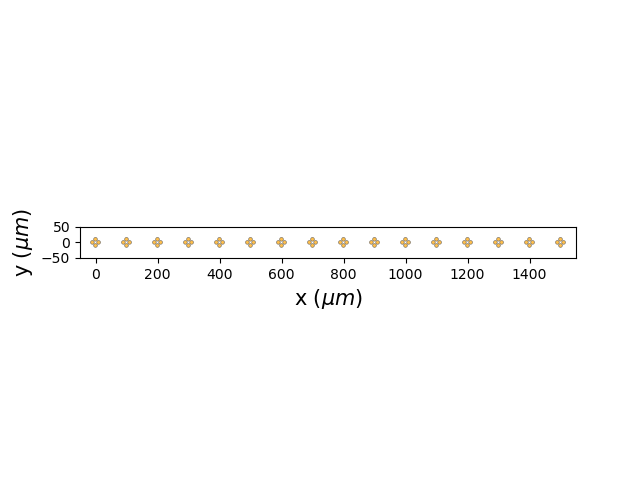

In [23]:
%matplotlib widget
channel_names = list(full_raw_rec.get_channel_ids())
print(channel_names)
probe_group = ProbeGroup()

for i in range(int(len(channel_names) / 4)):
    tetrode = generate_tetrode()
    tetrode.move([i * 100, 0])
    tetrode.set_contact_ids([4*i, (4*i)+1, (4*i)+2, (4*i)+3])
    probe_group.add_probe(tetrode)
    
probe_group.set_global_device_channel_indices([i for i in range(64)])

raw_rec = full_raw_rec.set_probegroup(probe_group, group_mode="by_probe")
plot_probegroup(probe_group, with_device_index=False, with_contact_id=False, same_axes=True)


In [ ]:
probe_indices = [i[0] for i in probe_group.get_global_device_channel_indices()]
device_indices = [i[1] for i in probe_group.get_global_device_channel_indices()]

df = pd.DataFrame({
    'contact_ids': probe_group.get_global_contact_ids(),
    'probe_index': [i[0] for i in probe_group.get_global_device_channel_indices()],
    'device_channel_index': [i[1] for i in probe_group.get_global_device_channel_indices()],
    'groups': raw_rec.get_channel_groups(),
    'channel_ids': raw_rec.get_channel_ids()
})



In [ ]:
df.head(16)

,contact_ids,probe_index,device_channel_index,groups,channel_ids
0,0,0,0,0,CH9
1,1,0,1,0,CH10
2,2,0,2,0,CH15
3,3,0,3,0,CH16
4,4,1,4,1,CH11
5,5,1,5,1,CH12
6,6,1,6,1,CH13
7,7,1,7,1,CH14
8,8,2,8,2,CH5
9,9,2,9,2,CH6


In [ ]:
pi.io.write_prb("C:\\Users\\ryanz\\Documents\\nac_analysis\\probe.prb", probe_group)

## First Visualization: Trace

Visualize voltage fluctuations as a function of time <br>
Set mode to "line" for better visualization <br>
both raw data and filtered data (getting rid of natural voltage fluctuations) are overlayed on top of eachother

In [26]:
recording_split = raw_rec.split_by(property='group')
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\traces"
tetrode_num = 7

In [27]:
recording_split

{0: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 1: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 2: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 3: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 4: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 5: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 6: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segmen

In [28]:
%matplotlib widget
si.plot_traces(recording_split[0], mode='line', time_range=[3940,3951], backend="ipywidgets", color_groups=True, show_channel_ids=True, events=np.array(events[5]))

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [29]:
for i in range(len(list(recording_split.keys()))):
    recording_tetrode = recording_split[i]
    recording_tetrode = si.bandpass_filter(recording_tetrode, freq_min=300, freq_max=6000)
    #recording_tetrode = si.scale(recording_tetrode, gain=0.1)
    recording_tetrode = si.whiten(recording_tetrode, dtype='float32')
    recording_split[i] = recording_tetrode


In [30]:
si.plot_traces(recording_split[0], mode='line', time_range=[3946.0,3947.5], backend="ipywidgets", color_groups=True, show_channel_ids=True, events=np.array(events[5]))

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [31]:
filtered = si.bandpass_filter(raw_rec, freq_min=300, freq_max=6000)
#scaled = si.scale(filtered, gain=0.1)
whitened = si.whiten(filtered, dtype='float32')
split_rec = whitened.split_by('group')
si.plot_traces(split_rec[0], mode='line', time_range=[3946.0,3947.5], backend="ipywidgets", color_groups=True, show_channel_ids=True)

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [30]:
#bad_channel_ids, channel_labels = si.detect_bad_channels(recording_tetrode, method='coherence+psd')
#print('bad_channel_ids', bad_channel_ids)
#print('channel_labels', channel_labels)


In [31]:
#tetrode_good_channels = recording_tetrode.remove_channels(['CH23'])
#%matplotlib widget
#bad_channel_ids, channel_labels = si.detect_bad_channels(recording_f, method='coherence+psd')
#print('bad_channel_ids', bad_channel_ids)
#print('channel_labels', channel_labels)
#recording_good_channels_f = recording_f.remove_channels(bad_channel_ids)
#recording_good_channels = si.common_reference(recording_good_channels_f, reference='global', operator='median')

#print(recording_good_channels)
#print(recording_good_channels.channel_ids)

#w = si.plot_traces(recording_good_channels, mode='line', time_range=[18.5, 19], backend="ipywidgets", events=np.array([18.6]), color_groups=True, show_channel_ids=True)

#recording_loaded = recording_good_channels

In [32]:
#tetrode_good_channels

In [33]:
#this will be the recording we will use in future processing
#recording_loaded = recording_tetrode

## Removing bad channels

## Sorting Spikes

In [34]:
#only take the first 60 seconds for processing speed purposes: need to set up cuda to run with GPU
#fs = recording_loaded.get_sampling_frequency()
#recording_sub = recording_loaded.frame_slice(start_frame=0*fs, end_frame=600*fs)


In [35]:
#recording_loaded = recording_sub

In [36]:
#recording_loaded

In [37]:
recording_split

{0: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 1: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 2: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 3: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 4: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 5: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segments - 234,705,900 samples 
                        7,823.53s (2.17 hours) - int16 dtype - 1.75 GiB,
 6: ChannelSliceRecording: 4 channels - 30.0kHz - 1 segmen

In [38]:
#si.write_binary_recording(raw_rec, file_paths="C:\\Users\\ryanz\\Documents\\nac_analysis\\traces\\kilosort4_binary.dat")

In [6]:
templates = np.load("C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output\\mountainsort5\\mountainsort5_phy\\templates.npy")
similar_templates = np.load("C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output\\mountainsort5\\mountainsort5_phy\\similar_templates.npy")


In [8]:
print(templates.data.shape)
print(similar_templates.shape)


(1, 90, 64)
(1, 1)


In [39]:
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"


print("running kilosort4")
sorted_recording = si.run_sorter("kilosort4", 
                                raw_rec, 
                                folder=save_path + f'\\kilosort4_sortings\\kilosort4_full_2', 
                                remove_existing_folder = True, 
                                verbose=True,       
                                nblocks=0,
                                nearest_chans=4,
                                save_preprocessed_copy=True,
                                torch_device="cuda"
                                )

sorted_recording = si.read_sorter_folder(save_path + f"\\kilosort4_sortings\\kilosort4_full_2")




"""
print("creating sorting analyzer")
sorting_analyzer = si.create_sorting_analyzer(sorted_recording, 
                                            raw_rec, 
                                            folder=save_path + f"\\kilosort4_sorting_analyzers\\kilosort4_full",
                                            format="binary_folder",
                                            sparse=False, 
                                            overwrite=True)
print("computing metrics")
sorting_analyzer.compute(["random_spikes", "waveforms", 'correlograms', 'spike_amplitudes', 
                        'templates','unit_locations', 'template_similarity', 'noise_levels', 
                        'isi_histograms', 'principal_components', 'quality_metrics', 'spike_locations'])

sorted_recording = None
sorting_analyzer = None


print('FINISHED CREATING SORTING ANALYZER')    
"""

running kilosort4


INFO:kilosort.io:========================================
INFO:kilosort.io:Loading recording with SpikeInterface...
INFO:kilosort.io:number of samples: 234705900
INFO:kilosort.io:number of channels: 64
INFO:kilosort.io:numbef of segments: 1
INFO:kilosort.io:sampling rate: 30000.0
INFO:kilosort.io:dtype: int16
INFO:kilosort.io:========================================
INFO:kilosort.run_kilosort: 
INFO:kilosort.run_kilosort:Computing preprocessing variables.
INFO:kilosort.run_kilosort:----------------------------------------
INFO:kilosort.run_kilosort:N samples: 234705900
INFO:kilosort.run_kilosort:N seconds: 7823.53
INFO:kilosort.run_kilosort:N batches: 3912
INFO:kilosort.run_kilosort:Preprocessing filters computed in  3.20s; total  3.21s
INFO:kilosort.run_kilosort: 
INFO:kilosort.run_kilosort:Resource usage after preprocessing
INFO:kilosort.run_kilosort:********************************************************
INFO:kilosort.run_kilosort:CPU usage:     6.00 %
INFO:kilosort.run_kilosort:Me

kilosort4 run time 1869.37s


'\nprint("creating sorting analyzer")\nsorting_analyzer = si.create_sorting_analyzer(sorted_recording, \n                                            raw_rec, \n                                            folder=save_path + f"\\kilosort4_sorting_analyzers\\kilosort4_full",\n                                            format="binary_folder",\n                                            sparse=False, \n                                            overwrite=True)\nprint("computing metrics")\nsorting_analyzer.compute(["random_spikes", "waveforms", \'correlograms\', \'spike_amplitudes\', \n                        \'templates\',\'unit_locations\', \'template_similarity\', \'noise_levels\', \n                        \'isi_histograms\', \'principal_components\', \'quality_metrics\', \'spike_locations\'])\n\nsorted_recording = None\nsorting_analyzer = None\n\n\nprint(\'FINISHED CREATING SORTING ANALYZER\')    \n'

In [ ]:
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"

for i in range(7, 8):
    print(f"PROCESSING TETRODE {i}")
    
    """
    print("running kilosort4")
    sorted_recording = si.run_sorter("kilosort4", 
                                    recording_split[i], 
                                    folder=save_path + f'\\kilosort4_sortings\\kilosort4_tetrode_{i}', 
                                    remove_existing_folder = True, 
                                    verbose=True,       
                                    nblocks=0,
                                    )
    """
    sorted_recording = si.read_sorter_folder(save_path + f"\\kilosort4_sortings\\kilosort4_tetrode_{i}")
    print("creating sorting analyzer")
    sorting_analyzer = si.create_sorting_analyzer(sorted_recording, 
                                                recording_split[i], 
                                                folder=save_path + f"\\kilosort4_sorting_analyzers\\kilosort4_tetrode_{i}",
                                                format="binary_folder",
                                                sparse=False, 
                                                overwrite=True)
    print("computing metrics")
    sorting_analyzer.compute(["random_spikes", "waveforms", 'correlograms', 'spike_amplitudes', 
                          'templates','unit_locations', 'template_similarity', 'noise_levels', 
                          'isi_histograms', 'principal_components', 'quality_metrics', 'spike_locations'])
    
    sorted_recording = None
    sorting_analyzer = None


    print('FINISHED CREATING SORTING ANALYZER')    


PROCESSING TETRODE 7
creating sorting analyzer


compute_waveforms:   0%|          | 0/7824 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/10 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/10 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations:   0%|          | 0/7824 [00:00<?, ?it/s]

calculate_pc_metrics:   0%|          | 0/10 [00:00<?, ?it/s]

FINISHED CREATING SORTING ANALYZER


### comment out to use previously loaded sorting

In [ ]:
#sort spikes

save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"

for i in range(0, 1): #len(list(recording_split.keys()))):
    print(f"PROCESSING TETRODE {i}")
    print("running spykingcircus2")
    sorted_recording = si.run_sorter("spykingcircus2", 
                                    recording_split[i], 
                                    folder=save_path + f'\\spykingcircus2_no_whiten_sortings\\spykingcircus2_no_whiten_tetrode_{i}', 
                                    remove_existing_folder = True, 
                                    verbose=True,
                                    #clustering = {'legacy': True},
                                    apply_preprocessing=False,
                                    detection= {"peak_sign": "neg", "detect_threshold": 8},
                                    cache_preprocessing= {"mode": "memory", "memory_limit": 0.1, "delete_cache": True}
                                    
                                    )
    
    print("creating sorting analyzer")
    sorting_analyzer = si.create_sorting_analyzer(sorted_recording, 
                                                recording_split[i], 
                                                folder=save_path + f"\\spykingcircus2_no_whiten_sorting_analyzers\\spykingcircus2_no_whiten_tetrode_{i}",
                                                format="binary_folder",
                                                sparse=False, 
                                                overwrite=True)
    
    sorting_analyzer.compute(["random_spikes", "waveforms", 'correlograms', 'spike_amplitudes', 
                          'templates','unit_locations', 'template_similarity', 'noise_levels', 
                          'isi_histograms', 'principal_components', 'quality_metrics', 'spike_locations'])
    
    sorted_recording = None
    sorting_analyzer = None


    print('FINISHED CREATING SORTING ANALYZER')    
    
    
"""

    


sorted_recording = si.run_sorter("spykingcircus2", 
                                 recording_loaded, 
                                 folder='test_spykingcircus_tetrode_0', 
                                 remove_existing_folder = True, 
                                 verbose=True,
                                 sparsity = {"method": "snr", "amplitude_mode": "peak_to_peak", "threshold": 1},
                                 filtering = {"freq_min": 300, "freq_max": 6000, "ftype": "bessel", "filter_order": 2},
                                 
                                )



sorted_recording = si.run_sorter_by_property(
    sorter_name ="mountainsort5", 
    recording = recording_loaded, 
    grouping_property ='group',
    folder =  "test_mountainsort",
    verbose=True,
    remove_existing_folder=True,
    scheme='3',
    filter=False,
    whiten=False 
)


sorter_params = {
    'detect_threshold': 6
}

sorted_recording = si.run_sorter(
    sorter_name ="mountainsort5", 
    recording = recording_sub, 
    folder =  "test_mountainsort_tetrode_7",
    verbose=True,
    remove_existing_folder=True,
    whiten=False,
    filter=False,  
    scheme='2',
    **sorter_params
)

"""

PROCESSING TETRODE 0
running spykingcircus2
Geometry of the probe does not allow 1D drift correction
Recording too large to be preloaded in RAM...


detect peaks using locally_exclusive:   0%|          | 0/7824 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer:   0%|          | 0/7824 [00:00<?, ?it/s]

detect peaks using matched_filtering:   0%|          | 0/78236 [00:00<?, ?it/s]

We found 7251 peaks in total
We kept 7251 peaks for clustering


extract waveforms shared_memory mono buffer:   0%|          | 0/7824 [00:00<?, ?it/s]

extracting features:   0%|          | 0/7824 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/4 [00:00<?, ?it/s]

estimate_templates:   0%|          | 0/7824 [00:00<?, ?it/s]

We found 6 raw clusters, starting to clean with matching...


write_memory_recording:   0%|          | 0/1 [00:00<?, ?it/s]

We kept 6 non-duplicated clusters...


estimate_templates:   0%|          | 0/7824 [00:00<?, ?it/s]

find spikes (wobble):   0%|          | 0/78236 [00:00<?, ?it/s]

We found 353317 spikes
TEMPLATE_DIFF_THRESH: 0.25
Final merging, keeping 6 units
spykingcircus2 run time 942.89s
creating sorting analyzer


compute_waveforms:   0%|          | 0/7824 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/6 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/6 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations:   0%|          | 0/7824 [00:00<?, ?it/s]

calculate_pc_metrics:   0%|          | 0/6 [00:00<?, ?it/s]

FINISHED CREATING SORTING ANALYZER


'\n\n    \n\n\nsorted_recording = si.run_sorter("spykingcircus2", \n                                 recording_loaded, \n                                 folder=\'test_spykingcircus_tetrode_0\', \n                                 remove_existing_folder = True, \n                                 verbose=True,\n                                 sparsity = {"method": "snr", "amplitude_mode": "peak_to_peak", "threshold": 1},\n                                 filtering = {"freq_min": 300, "freq_max": 6000, "ftype": "bessel", "filter_order": 2},\n                                 \n                                )\n\n\n\nsorted_recording = si.run_sorter_by_property(\n    sorter_name ="mountainsort5", \n    recording = recording_loaded, \n    grouping_property =\'group\',\n    folder =  "test_mountainsort",\n    verbose=True,\n    remove_existing_folder=True,\n    scheme=\'3\',\n    filter=False,\n    whiten=False \n)\n\n\nsorter_params = {\n    \'detect_threshold\': 6\n}\n\nsorted_recording =

In [ ]:
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"

for i in range(len(list(recording_split.keys()))):
    print(f"PROCESSING TETRODE {i}")
    print("creating sorting analyzer")
    sorted_recording = si.read_sorter_folder(save_path + f"\\spykingcircus2_sortings\\spykingcircus2_tetrode_{i}")
    sorting_analyzer = si.create_sorting_analyzer(sorted_recording, 
                                                recording_split[i], 
                                                folder=save_path + f"\\spykingcircus2_sorting_analyzers\\spykingcircus2_tetrode_{i}",
                                                format="binary_folder",
                                                sparse=False, 
                                                overwrite=True)
    
    sorting_analyzer.compute(["random_spikes", "waveforms", 'correlograms', 'spike_amplitudes', 
                          'templates','unit_locations', 'template_similarity', 'noise_levels', 
                          'isi_histograms', 'principal_components', 'quality_metrics', 'spike_locations'])
    
    sorted_recording = None
    sorting_analyzer = None


    print('FINISHED CREATING SORTING ANALYZER')


### load saved sorted object

In [2]:
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"

sorting_analyzer = si.load_sorting_analyzer(folder=save_path + "\\mountainsort5\\mountainsort5_sorting_analyzer")
sorting_analyzer.compute(["random_spikes", "waveforms", 'correlograms', 'spike_amplitudes', 
                'templates','unit_locations', 'template_similarity', 'noise_levels', 
                'isi_histograms', 'principal_components', 'quality_metrics', 'spike_locations', 'template_metrics'])

AttributeError: 'NoneType' object has no attribute 'delete'

In [5]:
si.export_to_phy(sorting_analyzer, save_path + "\\mountainsort5\\mountainsort5_phy_2")

write_binary_recording:   0%|          | 0/120 [00:00<?, ?it/s]

spike_amplitudes:   0%|          | 0/120 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'run_for_all_spikes'

In [ ]:

sorting_analysis_links = []

save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"
for i in range(16):
    sorted_recording = si.read_sorter_folder(save_path + f"\\spykingcircus2_sortings\\spykingcircus2_tetrode_{i}")
    sorting_analyzer = si.load_sorting_analyzer(folder=save_path + f"\\spykingcircus2_sorting_analyzers\\spykingcircus2_tetrode_{i}")
    sorting_analysis_links.append(sw.plot_sorting_summary(sorting_analyzer, curation=True, backend='sortingview', unit_table_properties=sorting_analyzer.get_extension("quality_metrics").get_data().columns))
    



https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://9206d8be0b97b99c7dfe9d7bdaba913df089138d
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://a9a71aa28f4d50b9a8b9fc15b73c12429124c880
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://6ec16424f6adc4bd5871fd16ee1d7976659d822e
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://25fb391d97b74980d516a5139f2da065bcf31695
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://7144e02a74790dc3c82b1597fce8c17c47cf8a0c
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://caee1249738b5786401c1784f616fc1e3ac1544c
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://40835c078ae8fd9a2d4982be960f57d716dc7379
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://efdc7ab1b73aa8a981dea4fa01d5b07b4abc7063
https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://001ba34af36d529

In [ ]:
snrs = {}
firing_rates = {}


save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"
for i in range(16):
    sorted_recording = si.read_sorter_folder(save_path + f"\\spykingcircus2_no_whiten_sortings\\spykingcircus2_no_whiten_tetrode_{i}")
    sorting_analyzer = si.load_sorting_analyzer(folder=save_path + f"\\spykingcircus2_no_whiten_sorting_analyzers\\spykingcircus2_no_whiten_tetrode_{i}")
    snrs[i] = list(sqm.compute_snrs(sorting_analyzer=sorting_analyzer).values())
    firing_rates[i] = list(sqm.compute_firing_rates(sorting_analyzer=sorting_analyzer).values())

In [50]:
tetrodes_meeting_conditions = 0

for i in range(16):
    meets_conditions = any(snr > 4 and 1 <= firing_rate <= 20 for snr, firing_rate in zip(snrs[i], firing_rates[i]))
    if meets_conditions:
        tetrodes_meeting_conditions += 1

print(f"Number of tetrodes with at least one unit meeting both conditions: {tetrodes_meeting_conditions}")


Number of tetrodes with at least one unit meeting both conditions: 7


In [ ]:
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output"
tetrode_num = 7
sorted_recording = si.read_sorter_folder(save_path + f"\\kilosort4_sortings\\kilosort4_tetrode_{tetrode_num}")
sorting_analyzer = si.load_sorting_analyzer(folder=save_path + f"\\kilosort4_sorting_analyzers\\kilosort4_tetrode_{tetrode_num}")


In [39]:
event_timestamps = np.array(events[5])
time_window = 10
spike_vector = sorted_recording.to_spike_vector()
units = np.unique(spike_vector['unit_index'])
spike_times = spike_vector['sample_index'][spike_vector['unit_index'] == 0] / sorted_recording.get_sampling_frequency() 
event_timestamps = event_timestamps[event_timestamps < 4107]
#for each event timestamp, get spike times within + or - time_window
spikes_around_events = []
for event_time in event_timestamps:
    spikes_in_window = spike_times[(spike_times >= event_time - time_window) & 
                                (spike_times <= event_time + time_window)]
    
    spikes_shifted = spikes_in_window - event_time
    
    spikes_around_events.extend(spikes_shifted)
    print(f"event time: {event_time}")
    print(spikes_shifted)

event time: 779.3965333333333
[-9.4217     -9.19856667 -9.18866667 -8.77026667 -8.7264     -8.7236
 -8.4226     -8.4223     -8.422      -8.4078     -8.4075     -8.40723333
 -8.40503333 -8.3892     -8.38286667 -8.25116667 -8.24583333 -8.24306667
 -8.23743333 -8.23116667 -8.22943333 -8.2259     -8.22413333 -8.2239
 -8.2129     -8.20776667 -8.19133333 -8.18383333 -8.183      -8.18226667
 -8.16966667 -8.14883333 -8.1326     -8.12203333 -8.06       -7.98646667
 -7.8289     -7.62513333 -7.427      -6.44353333  4.49033333  4.60743333
  4.60766667  5.54283333  5.68496667  5.80466667  5.93336667  6.44126667
  6.55726667  7.17356667  7.28793333  7.65663333  8.1987    ]
event time: 781.4965
[-9.92886667 -9.7251     -9.52696667 -8.5435      2.39036667  2.50746667
  2.5077      3.44286667  3.585       3.7047      3.8334      4.3413
  4.4573      5.0736      5.18796667  5.55666667  6.09873333]
event time: 782.1964666666667
[-9.24346667  1.6904      1.8075      1.80773333  2.7429      2.88503333
  3.

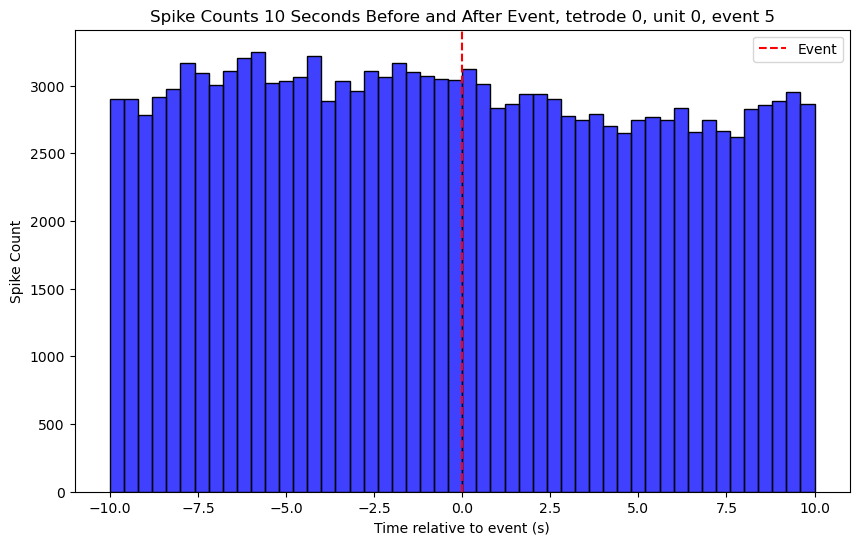

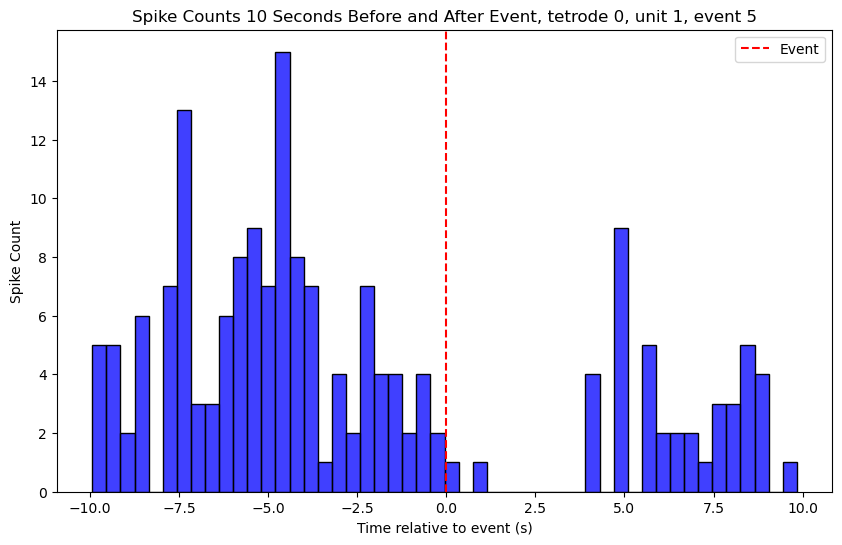

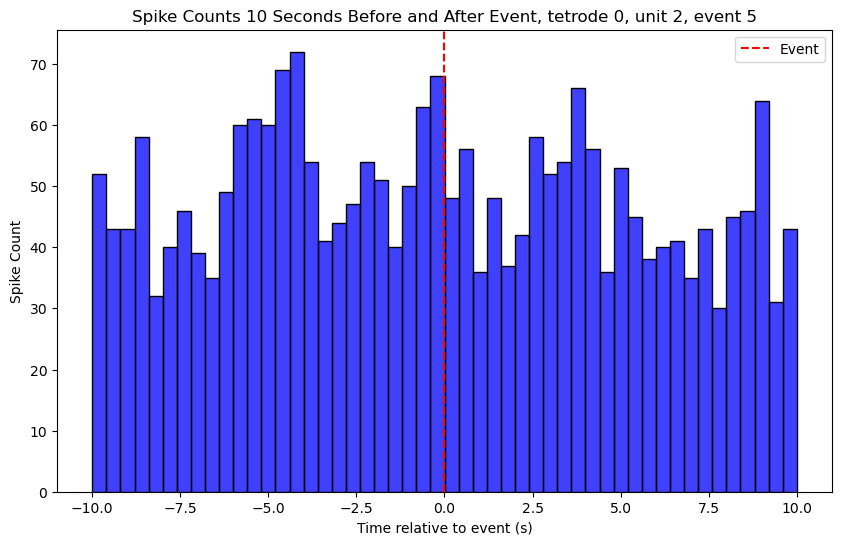

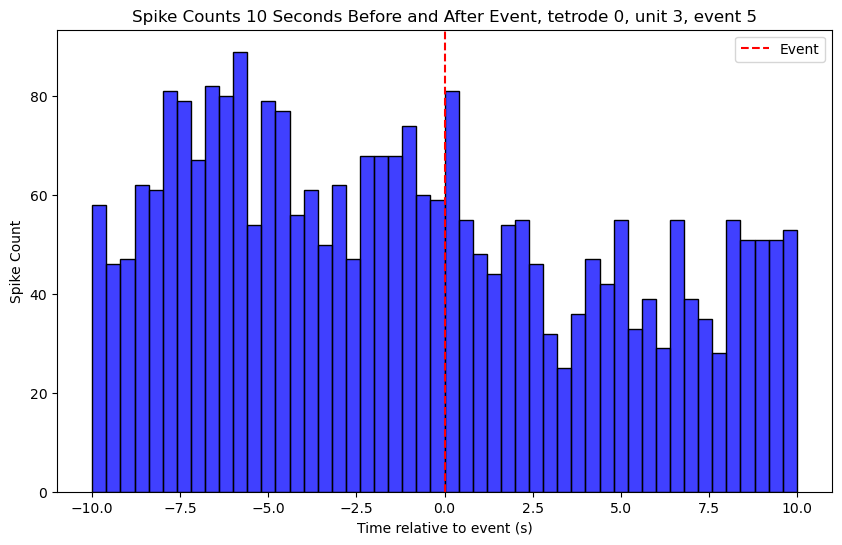

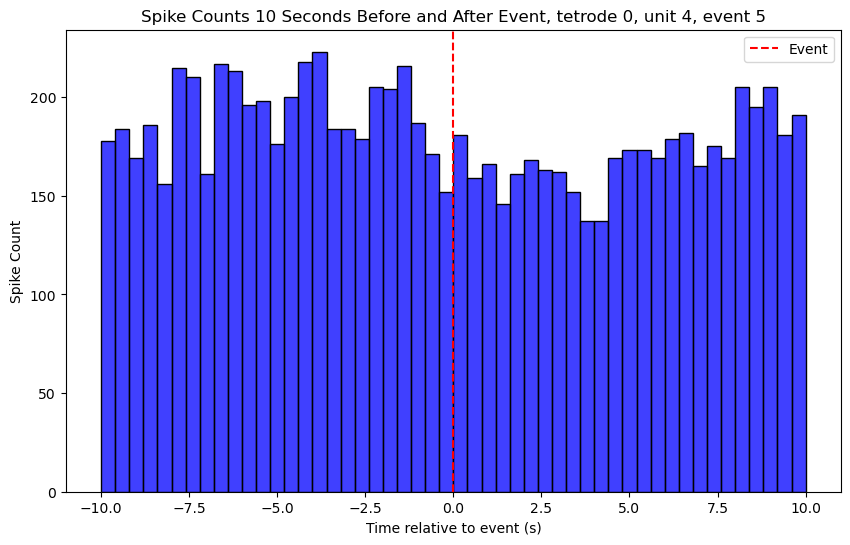

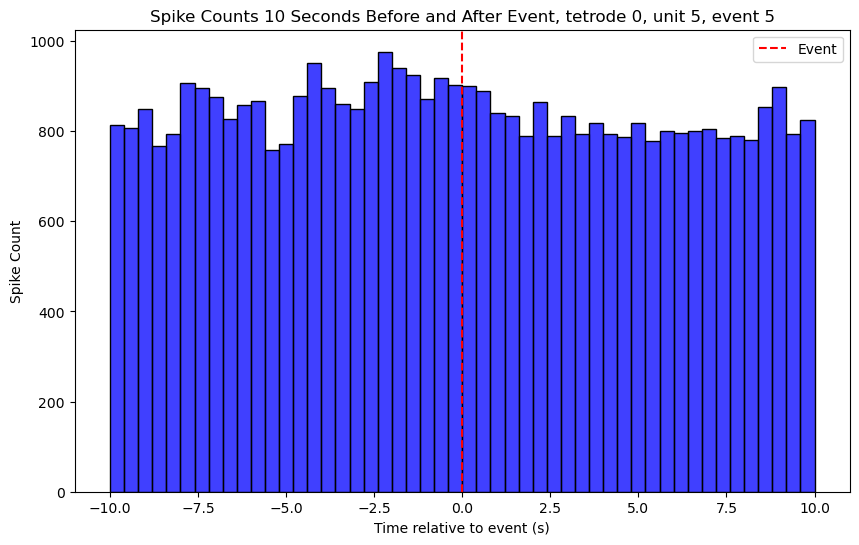

In [31]:
%matplotlib inline


# Iterate over all neuron units
for unit in [0,1,2,3,4,5]:
    
    # Get event timestamps and consolidate them
    event_timestamps = np.array(events[5])
    event_timestamps = event_timestamps[event_timestamps < 4107]

    
    # Get spike timestamps
    time_window = 10
    spike_vector = sorted_recording.to_spike_vector()
    spike_times = spike_vector['sample_index'][spike_vector['unit_index'] == unit] / sorted_recording.get_sampling_frequency() 
    
    # For each consolidated event timestamp, get spike times within ±time_window
    spikes_around_events = []
    for event_time in event_timestamps:
        spikes_in_window = spike_times[(spike_times >= event_time - time_window) & 
                                       (spike_times <= event_time + time_window)]
        spikes_shifted = spikes_in_window - event_time
        spikes_around_events.extend(spikes_shifted)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.histplot(spikes_around_events, bins=50, kde=False, color='blue')
    plt.xlabel('Time relative to event (s)')
    plt.ylabel('Spike Count')
    plt.title(f'Spike Counts 10 Seconds Before and After Event, tetrode {tetrode_num}, unit {unit}, event {5}')
    plt.axvline(0, color='red', linestyle='--', label='Event')
    plt.legend()
    plt.show()


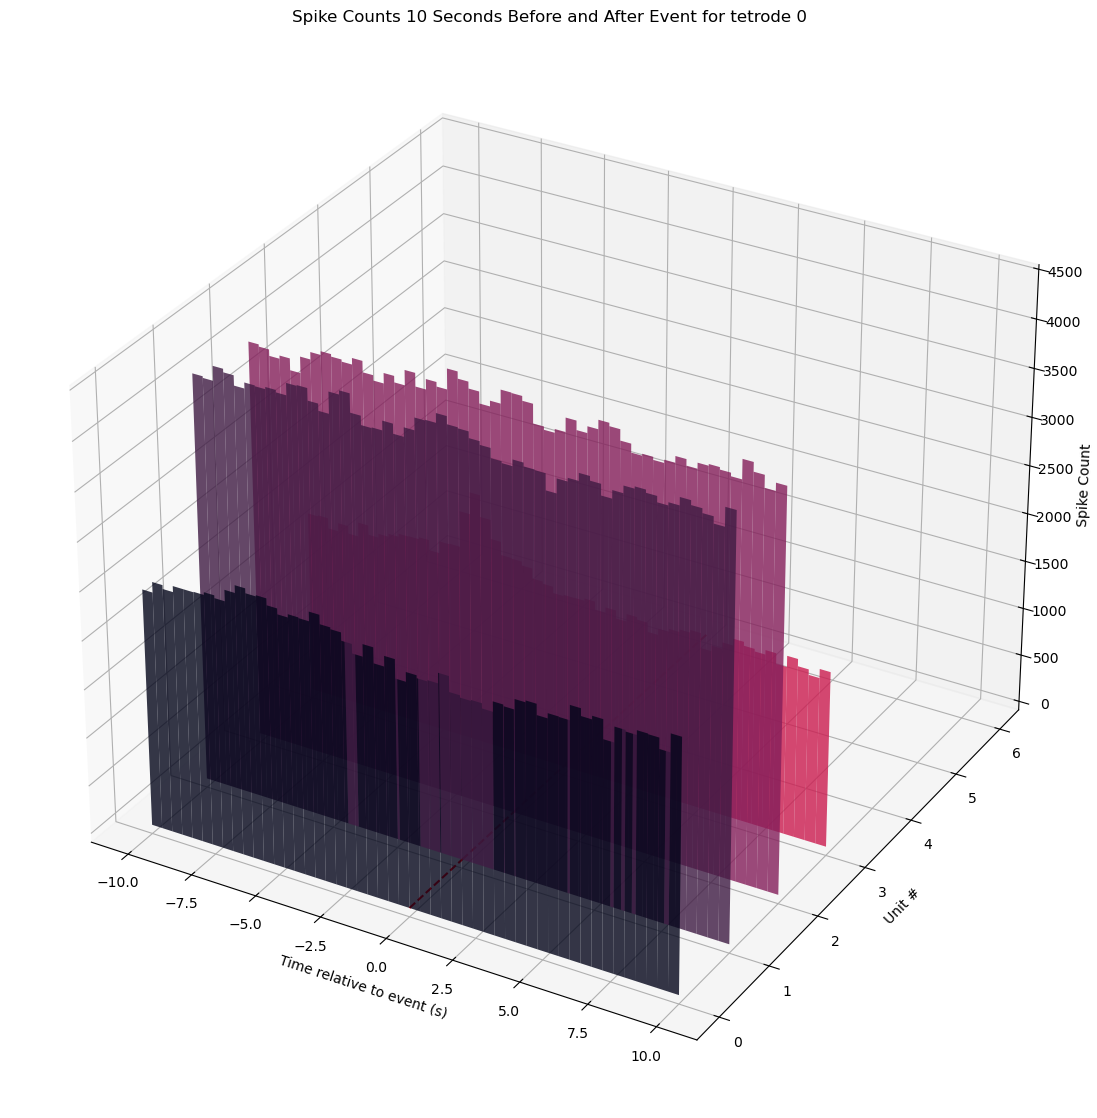

In [39]:

%matplotlib inline

# Create figure and 3D axis
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

# Define a colormap
cmap = sns.color_palette("rocket", as_cmap=True)

# Iterate over all neuron units
for i, unit in enumerate([0,1,2,3,4,5]):
    
    # Get event timestamps
    event_timestamps = events[5]
    
    # Get spike timestamps
    time_window = 10
    spike_vector = sorted_recording.to_spike_vector()
    units = np.unique(spike_vector['unit_index'])
    spike_times = []
    times = spike_vector['sample_index'][spike_vector['unit_index'] == unit] / sorted_recording.get_sampling_frequency() 
    for time in times:
        spike_times.append(time)
    spike_times = sorted(spike_times)
    spike_times = np.array(spike_times)

    # For each event timestamp, get spike times within ± time_window
    spikes_around_events = []
    for event_time in event_timestamps:
        spikes_in_window = spike_times[(spike_times >= event_time - time_window) & 
                                       (spike_times <= event_time + time_window)]
        
        spikes_shifted = spikes_in_window - event_time
        spikes_around_events.extend(spikes_shifted)
    
    # Compute histogram
    hist, bin_edges = np.histogram(spikes_around_events, bins=50, range=(-time_window, time_window))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # Plot each unit's histogram along the z-axis with a unique color
    color = cmap(i / len([0, 1, 2, 3, 4, 5]))  # Get a unique color for each unit
    ax.bar(bin_centers, hist, zs=i, zdir='y', alpha=0.8, width=0.4, color=color)

    # Add event line on the time (x) axis
    ax.plot([0, 0], [i, i + 1], [0, 0], color='red', linestyle='--', linewidth=1.5)

# Set labels and title
ax.set_xlabel('Time relative to event (s)')
ax.set_ylabel('Unit #')
ax.set_zlabel('Spike Count')
plt.title(f'Spike Counts 10 Seconds Before and After Event for tetrode {tetrode_num}')

plt.show()


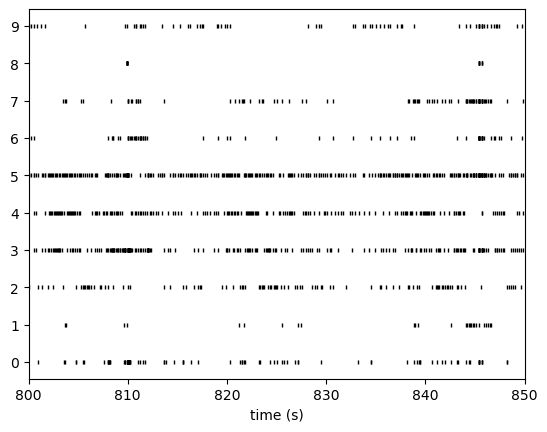

In [43]:
#plot rasters
%matplotlib inline
w_rs = si.plot_rasters(sorted_recording, time_range=(800,850), backend="matplotlib")


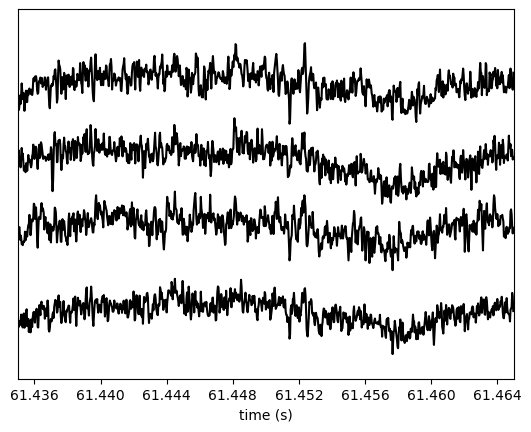

In [44]:
si.plot_spikes_on_traces(sorting_analyzer, time_range=[61.435,61.465])

In [ ]:
#create and save sorting analyzer object. comment to just load already saved sorting analyzer
"""
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output\\spykingcircus2_sorting_analyzers\\spykingcircus2_tetrode_15"
sorting_analyzer = si.create_sorting_analyzer(sorted_recording, 
                                              recording_split[15], 
                                              folder=save_path,
                                              format="binary_folder",
                                              sparse=False, 
                                              overwrite=True)
"""

In [ ]:
#comment if already computed
"""
sorting_analyzer.compute(["random_spikes", "waveforms", 'correlograms', 'spike_amplitudes', 
                          'templates','unit_locations', 'template_similarity', 'noise_levels', 
                          'isi_histograms', 'principal_components', 'quality_metrics', 'spike_locations'])
"""

compute_waveforms:   0%|          | 0/7824 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/7 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/7 [00:00<?, ?it/s]

Compute : spike_amplitudes + spike_locations:   0%|          | 0/7824 [00:00<?, ?it/s]

calculate_pc_metrics:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#load sorting analyzer object
save_path = "C:\\Users\\ryanz\\Documents\\nac_analysis\\sorter_output\\spykingcircus2_sorting_analyzers\\spykingcircus2_tetrode_13"
sorting_analyzer = si.load_sorting_analyzer(folder=save_path)


In [47]:
sw.plot_sorting_summary(sorting_analyzer, curation=True, backend='sortingview', unit_table_properties=sorting_analyzer.get_extension("quality_metrics").get_data().columns)

https://figurl.org/f?v=npm://@fi-sci/figurl-sortingview@12/dist&d=sha1://b0c67563159b0d1308796fc1ee0c8eb423cc231a


In [41]:
SNRs = sqm.compute_snrs(sorting_analyzer=sorting_analyzer)
SNRs

{0: 142.91700972096658,
 1: 91.15424127376151,
 2: 151.23294786291387,
 3: 48.01833444599567,
 4: 115.55864959857516,
 5: 74.07927649479915,
 6: 59.2238975188227,
 7: 75.36994888122697,
 8: 21.853696628887203,
 9: 26.795912249755474,
 10: 10.557861268348649,
 11: 14.754291111594528,
 12: 43.14017208361375,
 13: 29.302059360834207,
 14: 10.477943718499779,
 15: 12.305086837423511,
 16: 30.546237987128148,
 17: 24.99628303104348,
 18: 3.3698552588208264,
 19: 7.018912871174402,
 20: 13.596620691220078,
 21: 21.41545458128267,
 22: 10.891568779188571,
 23: 13.586558561269877,
 24: 14.38415791763751,
 25: 12.323906009680659,
 26: 4.204679341560348,
 27: 11.888622301097177,
 28: 5.478484861298407,
 29: 11.853484464327726,
 30: 13.634969524198516,
 31: 5.416183086497455,
 32: 7.24836029452596,
 33: 7.0717808448083765,
 34: 19.387609755650235,
 35: 6.615624874228367,
 36: 6.14523726777901,
 37: 8.428430334001726,
 38: 5.792090104198773,
 39: 6.576581487536445,
 40: 4.177086051486512,
 41: 7.5

In [42]:
firing_rate = sqm.compute_firing_rates(sorting_analyzer=sorting_analyzer)
firing_rate

{0: 0.013165412543953944,
 1: 0.011631578072813679,
 2: 0.016233081486234476,
 3: 0.02441353199898256,
 4: 0.03310526066877739,
 5: 0.0026842103244954646,
 6: 0.003962405717112353,
 7: 0.0019172930889253318,
 8: 0.018661652732206564,
 9: 0.05547368003957293,
 10: 0.28542103117135104,
 11: 0.013932329779524077,
 12: 0.12577442663350177,
 13: 0.005496240188252618,
 14: 0.061225559306348924,
 15: 0.008947367748318214,
 16: 0.008563909130533148,
 17: 0.02006766766408514,
 18: 0.2426014855186853,
 19: 0.030293230805020242,
 20: 0.06927819027983532,
 21: 0.01993984812482345,
 22: 0.030932328501328685,
 23: 0.009842104523150036,
 24: 0.020578945821131893,
 25: 0.19799246631635592,
 26: 0.716300698022504,
 27: 0.020195487203346827,
 28: 0.11209773593250107,
 29: 0.016488720564757853,
 30: 0.03847368131776832,
 31: 0.044736838741591074,
 32: 0.023390975684889046,
 33: 0.3810300465390943,
 34: 0.02287969752784229,
 35: 0.03911277901407677,
 36: 0.05892480759963853,
 37: 0.14801502646503562,
 38:

In [46]:
isi_violations_ratio, isi_violations_count = sqm.compute_isi_violations(sorting_analyzer, isi_threshold_ms=0.5)
isi_violations_ratio

{0: 0.0,
 1: 944.756671899529,
 2: 970.1196602393204,
 3: 214.45492174008385,
 4: 2332.56212638452,
 5: 35480.86167800453,
 6: 0.0,
 7: 34771.24444444445,
 8: 0.0,
 9: 290.7510777463951,
 10: 273.0074851257117,
 11: 0.0,
 12: 638.3217558166434,
 13: 0.0,
 14: 340.9822132923061,
 15: 0.0,
 16: 1742.8224548897304,
 17: 317.3974603432188,
 18: 267.1255611530522,
 19: 0.0,
 20: 1571.2894364183492,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 573.8687614117024,
 26: 147.97656575985033,
 27: 0.0,
 28: 528.9406068422852,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 147.02638234030778,
 34: 0.0,
 35: 0.0,
 36: 441.7556853205095,
 37: 64.17683845353045,
 38: 151.79457890606014,
 39: 243.70198469206125,
 40: 139.09673653098108,
 41: 0.0,
 42: 0.0,
 43: 116.628106319226,
 44: 18.752287790770175,
 45: 26.309580465613482,
 46: 55.51363634396971,
 47: 5.296876004987559,
 48: 12.320993554916098,
 49: 1.0714187381770028}

In [86]:
unit_ids = sorted_recording.get_unit_ids()
print(unit_ids)


[0 1 2 3]


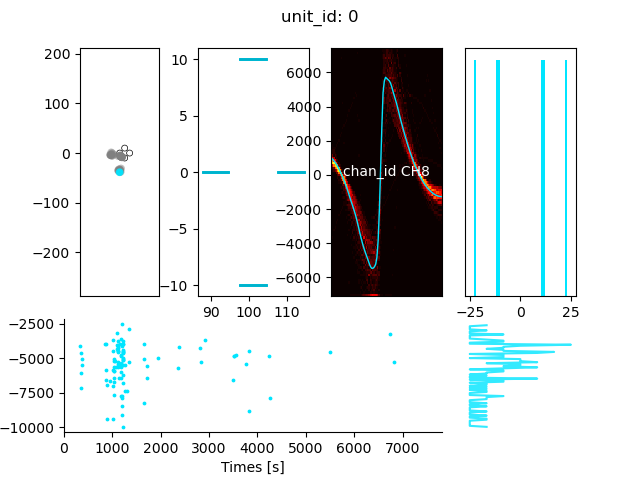

In [47]:
si.plot_unit_summary(sorting_analyzer, unit_id=0)

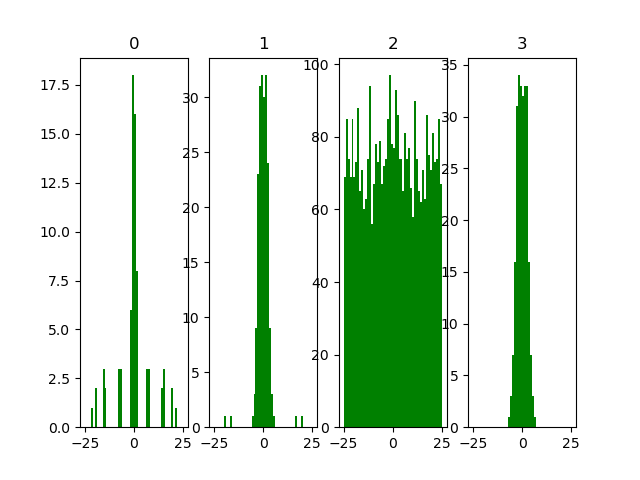

In [52]:
sw.plot_autocorrelograms(sorting_analyzer, bin_ms = 1, window_ms=100)

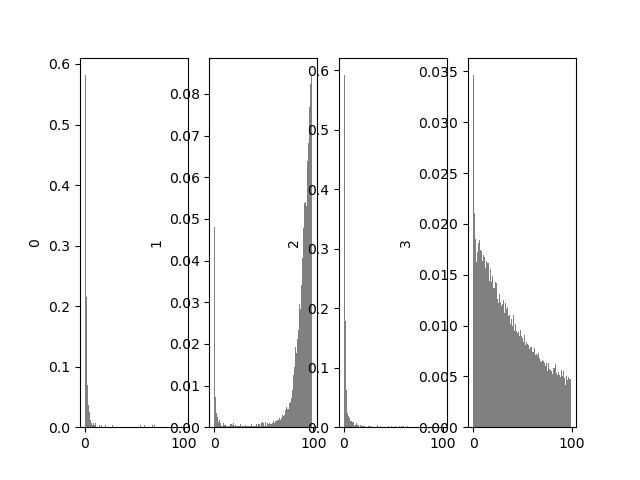

In [47]:
sw.plot_isi_distribution(sorted_recording, unit_ids=unit_ids)

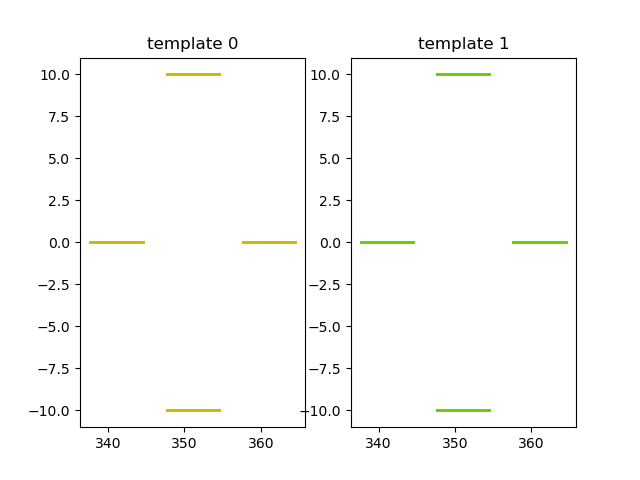

In [ ]:
sw.plot_unit_waveforms(sorting_analyzer, unit_ids=unit_ids)

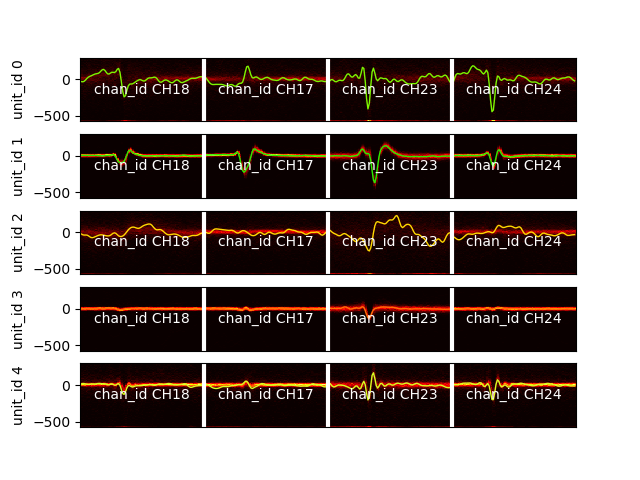

In [55]:
sw.plot_unit_waveforms_density_map(sorting_analyzer, unit_ids=[0,1,2,3,4])

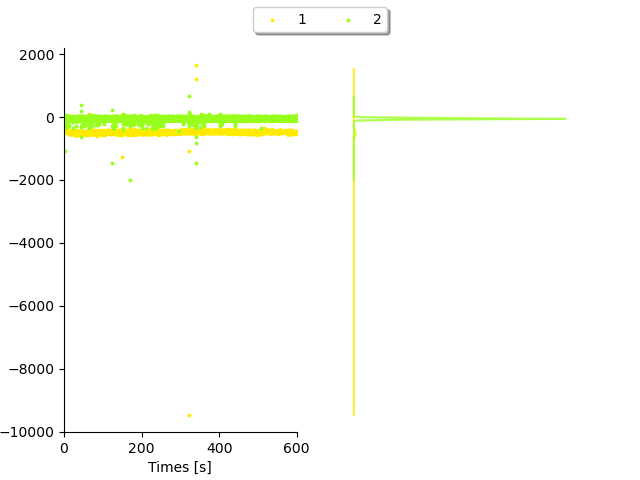

In [52]:
sw.plot_amplitudes(sorting_analyzer, plot_histograms=True)

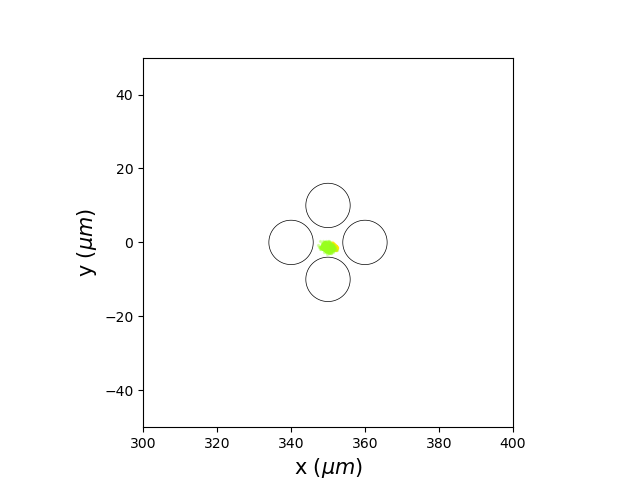

In [53]:
sw.plot_spike_locations(sorting_analyzer)

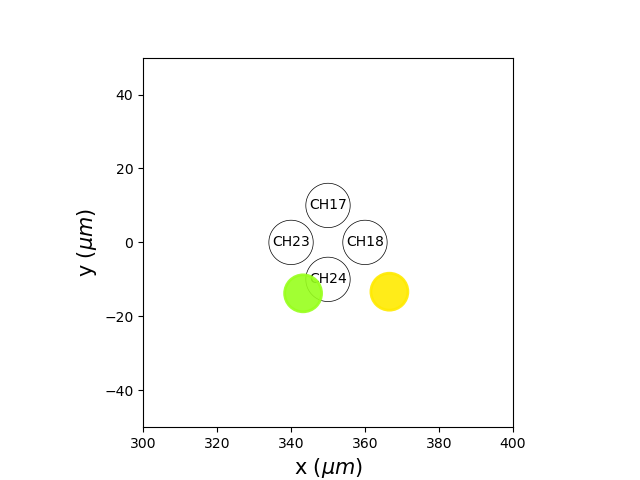

In [54]:
sw.plot_unit_locations(sorting_analyzer, with_channel_ids=True)

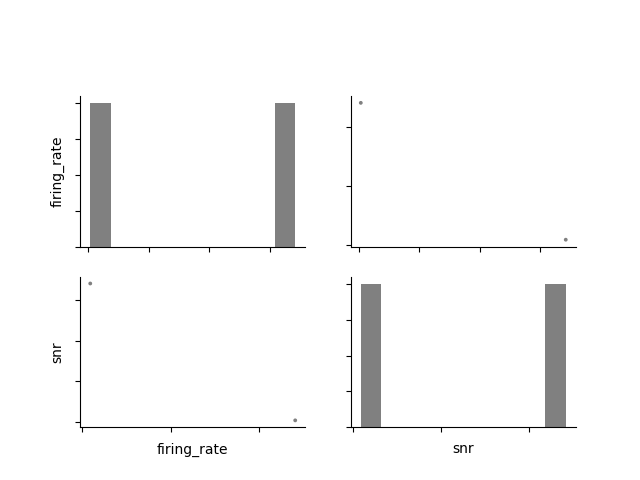

In [55]:
si.plot_quality_metrics(
    sorting_analyzer,
    include_metrics=['firing_rate', 'snr']
)

In [56]:
spike_vector = sorted_recording.to_spike_vector()


In [52]:
len(spike_vector)


690231

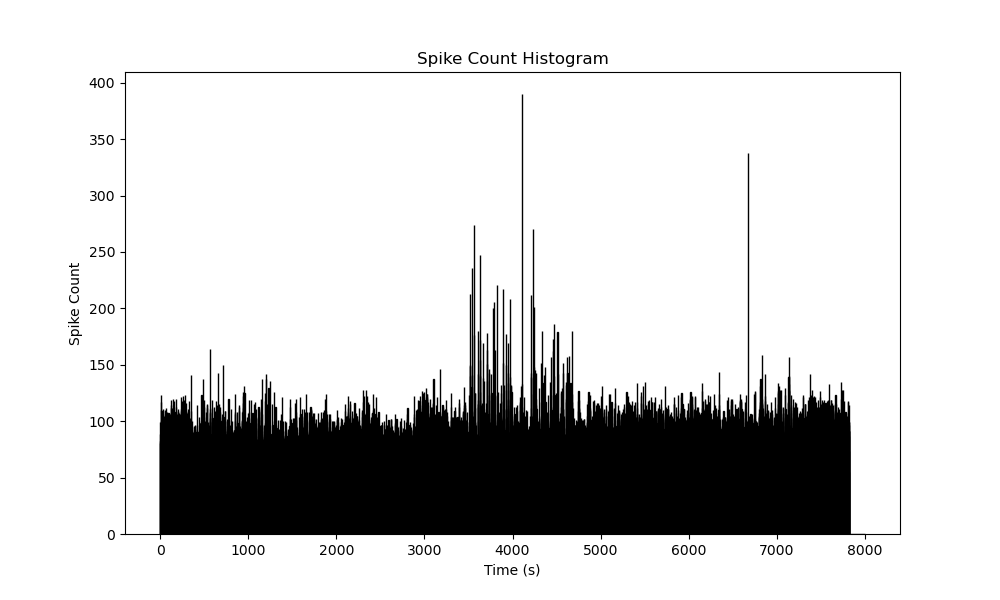

In [53]:
spike_vector = sorted_recording.to_spike_vector()
units = np.unique(spike_vector['unit_index'])

bin_edges = np.arange(0, 8000, 1)
spike_counts = np.zeros(len(bin_edges) - 1)

for unit in units:
    spike_times = spike_vector['sample_index'][spike_vector['unit_index'] == unit] / sorted_recording.get_sampling_frequency() 
    spike_counts_per_unit, _ = np.histogram(spike_times, bins=bin_edges)
    spike_counts += spike_counts_per_unit  

plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], spike_counts, width=1, edgecolor='black', align='edge')
plt.xlabel('Time (s)')
plt.ylabel('Spike Count')
plt.title('Spike Count Histogram')
plt.show()


In [ ]:
sorted_recording.get_times()  